# Clustering

Clustering, in one sentence, is the extraction of natural groupings of similar data objects.

![](https://miro.medium.com/max/720/0*Uw1hHssz9RbqqMXo)

            Republican and Democrat clusters of senators

clustering is a technique used in machine learning to group data points together. The goal of clustering is to find natural groups, or clusters, in the data. Clustering algorithms are used to automatically find these groups. Clustering is useful because it can help to find problems in the data, such as outliers. It can also be used to improve the accuracy of machine learning models by providing more information about the structure of the data. In addition, clustering can be used to compress data, which can speed up training time for machine learning models. overall, clustering is a valuable tool that can be used to understand and improve machine learning models.

---

# **Hierarchical clustering**

**Hierarchical clustering is a popular method for grouping objects. It creates groups so that objects within a group are similar to each other and different from objects in other groups. Clusters are visually represented in a hierarchical tree called a dendrogram.**

Hierarchical clustering is an unsupervised learning method for clustering data points. The algorithm builds clusters by measuring the dissimilarities between data. Unsupervised learning means that a model does not have to be trained, and we do not need a "target" variable. This method can be used on any data to visualize and interpret the relationship between individual data points.

## How it works?

A Hierarchical clustering method works via grouping data into a tree of clusters. Hierarchical clustering begins by treating every data point as a separate cluster. Then, it repeatedly executes the subsequent steps:

    Identify the 2 clusters which can be closest together, and
    Merge the 2 maximum comparable clusters. We need to continue these steps until all the clusters are merged together.

In Hierarchical Clustering, the aim is to produce a hierarchical series of nested clusters. A diagram called Dendrogram (A Dendrogram is a tree-like diagram that statistics the sequences of merges or splits) graphically represents this hierarchy and is an inverted tree that describes the order in which factors are merged (bottom-up view) or clusters are broken up (top-down view).

![](https://media.geeksforgeeks.org/wp-content/uploads/20200204181551/Untitled-Diagram71.png)

# **HCA**

![](https://miro.medium.com/max/257/0*iozEcRXXWXbDMrdG.gif)

### Algorithm:

    Require: X /*data set*/, k /*number of clusters*/

     1: /*initialize*/

     2: χ = {}

     3: for i = 1 : N do

     4:  Ci = {xi}

     5:  χ=χ∪Ci

     6: end for

     7: while |χ| &gt; k do

     8:  (i*,j*)=arg mini,j∈[1…|χ|]:i≠jDIST(Ci,Cj)

     9:  χ=χ−{Ci*,Cj*}∪(Ci*∪Cj*)

    10: end while

    11: return χ

Agglomerative Process

    Choose a distance function for items  d(xi,xj)
    Choose a distance function for clusters D(Ci,Cj) - for clusters formed by just one point, D should reduce to d.
    Start from N clusters, each containing one item.  Then, at each iteration:
        a) using the current matrix of cluster distances, find two closest clusters.
        b) update the list of clusters by merging the two closest.
        c) update the matrix of cluster distances accordingly
    Repeat until all items are joined in one cluster.


![](https://miro.medium.com/max/480/0*BfO2YN_BSxThfUoo.gif)

Start by visualizing some data points:

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('dark')

Now we compute the ward linkage using euclidean distance, and visualize it using a dendrogram

In [2]:
X1 = np.array([[1,1], [3,2], [9,1], [3,7], [7,2], [9,7], [4,8], [8,3],[1,4]])

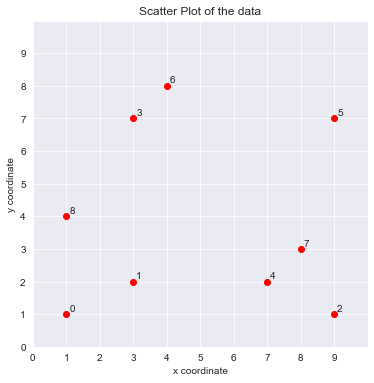

In [3]:
plt.figure(figsize=(6, 6))

plt.scatter(X1[:,0], X1[:,1], c='r')

# Create numbered labels for each point
for i in range(X1.shape[0]):
    plt.annotate(str(i), xy=(X1[i,0], X1[i,1]), xytext=(3, 3), textcoords='offset points')
    
plt.xlabel('x coordinate')
plt.ylabel('y coordinate')
plt.title('Scatter Plot of the data')
plt.xlim([0,10]), plt.ylim([0,10])
plt.xticks(range(10)), plt.yticks(range(10))
plt.grid()

plt.show()


Here, we do the same thing with Python's scikit-learn library. Then, visualize on a 2-dimensional plot:

In [4]:
from scipy.cluster.hierarchy import dendrogram, linkage

Z1 = linkage(X1, method='single', metric='euclidean')
Z2 = linkage(X1, method='complete', metric='euclidean')
Z3 = linkage(X1, method='average', metric='euclidean')
Z4 = linkage(X1, method='ward', metric='euclidean')

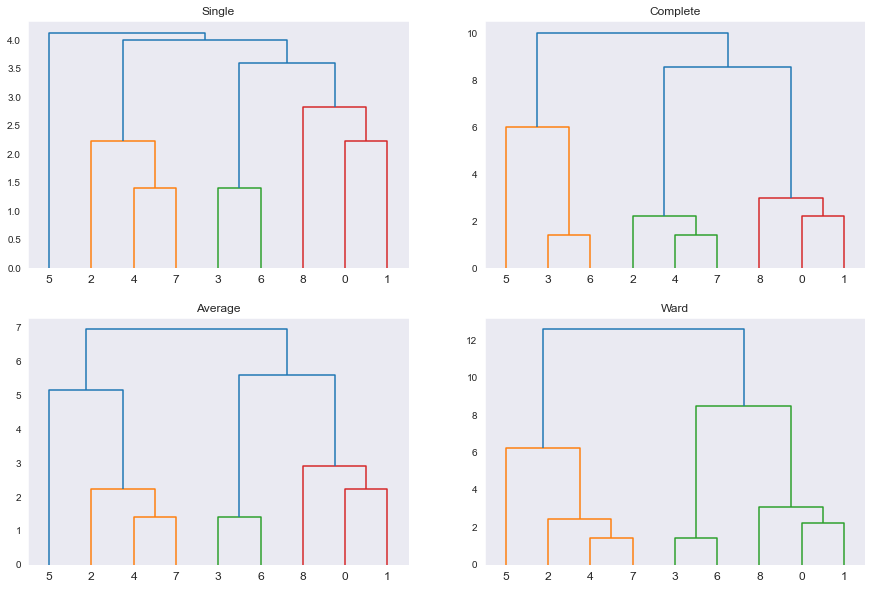

In [5]:
plt.figure(figsize=(15, 10))
plt.subplot(2,2,1), dendrogram(Z1), plt.title('Single')
plt.subplot(2,2,2), dendrogram(Z2), plt.title('Complete')
plt.subplot(2,2,3), dendrogram(Z3), plt.title('Average')
plt.subplot(2,2,4), dendrogram(Z4), plt.title('Ward')
plt.show()

In [6]:
from scipy.cluster.hierarchy import fcluster

f1 = fcluster(Z4, 2, criterion='maxclust')

print(f"Clusters: {f1}")

Clusters: [2 2 1 2 1 1 2 1 2]


In [8]:
from sklearn.cluster import AgglomerativeClustering

Z1 = AgglomerativeClustering(n_clusters=2, linkage='ward')

Z1.fit_predict(X1)

print(Z1.labels_)


[0 0 1 0 1 1 0 1 0]


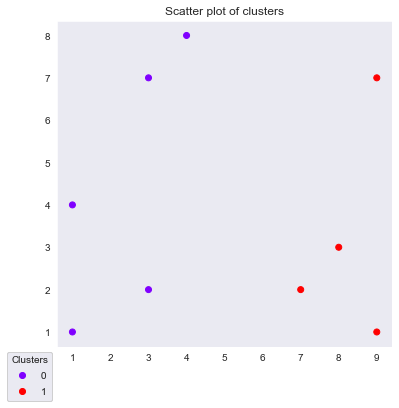

In [32]:
fig, ax = plt.subplots(figsize=(6, 6))

scatter = ax.scatter(X1[:,0], X1[:,1], c=Z1.labels_, cmap='rainbow')

legend = ax.legend(*scatter.legend_elements(), title="Clusters", bbox_to_anchor=(2, 2))
ax.add_artist(legend)

plt.title('Scatter plot of clusters')

plt.show()


In [17]:
import pandas as pd
df = pd.read_csv('https://raw.githubusercontent.com/LearnDataSci/glossary/main/data/protein.csv')
df.head()

,Country,RedMeat,WhiteMeat,Eggs,Milk,Fish,Cereals,Starch,Nuts,Fr.Veg
0,Albania,10.1,1.4,0.5,8.9,0.2,42.3,0.6,5.5,1.7
1,Austria,8.9,14.0,4.3,19.9,2.1,28.0,3.6,1.3,4.3
2,Belgium,13.5,9.3,4.1,17.5,4.5,26.6,5.7,2.1,4.0
3,Bulgaria,7.8,6.0,1.6,8.3,1.2,56.7,1.1,3.7,4.2
4,Czechoslovakia,9.7,11.4,2.8,12.5,2.0,34.3,5.0,1.1,4.0


In [19]:
X2 = df.iloc[:,1:10]

In [13]:
Z2 = linkage(X2, method='ward', metric='euclidean')

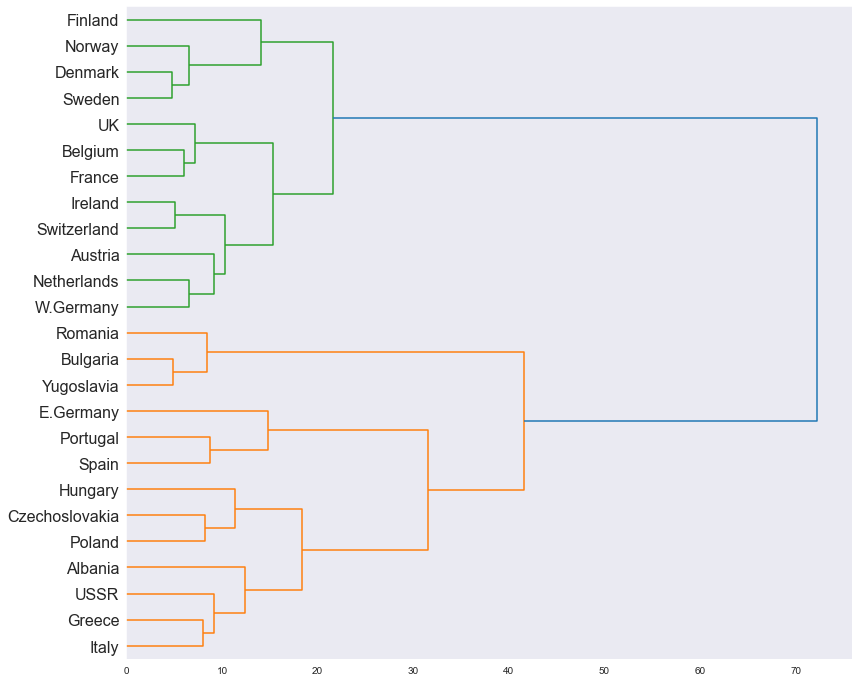

In [14]:
labelList = list(df['Country'])

plt.figure(figsize=(13, 12))
dendrogram(
    Z2,
    orientation='right',
    labels=labelList,
    distance_sort='descending',
    show_leaf_counts=False,
    leaf_font_size=16
)
plt.show()

---

# **Bayesian hierarchical clustering**

This algorithm has several advantages over traditional distance-based agglomerative clustering algorithms.


- (1) It defines a probabilistic model of the data which can be used to compute the predictive distribution of a test point and the probability of it belonging to any of the existing clusters in the tree.


-  (2) It uses a model-based criterion to decide on merging clusters rather than an ad-hoc distance metric.


-   (3) Bayesian hypothesis testing is used to decide which merges are advantageous and to output the recommended depth of the tree.


-    (4) The algorithm can be interpreted as a novel fast bottom-up approximate inference method for a Dirichlet process (i.e. countably infinite) mixture model (DPM)

There are several limitations to the traditional hierarchical clustering algorithm. The algorithm provides
no guide to choosing the “correct” number of clusters
or the level at which to prune the tree. It is often difficult to know which distance metric to choose, especially for structured data such as images or sequences.
The traditional algorithm does not define a probabilistic model of the data, so it is hard to ask how “good”
a clustering is, to compare to other models, to make
predictions and cluster new data into an existing hierarchy.

# How it works?

Bayesian hierarchical clustering algorithm uses
marginal likelihoods to decide which clusters to merge
and to avoid overfitting. Basically it asks what the
probability is that all the data in a potential merge
were generated from the same mixture component,
and compares this to exponentially many hypotheses
at lower levels of the tree

### Algorithm:

!["test"](https://github.com/showmidelo/SBU-ML-Winter-23/blob/main/Bayesian%20Hierarchical%20Clustering.jpg?raw=true)

![](https://github.com/caponetto/bayesian-hierarchical-clustering-examples/blob/main/results/bhc_plot.png?raw=true)

---

In [27]:
import pandas as pd

df = pd.read_csv("C:\\Users\\Lion\\Desktop\\StudentsPerformance.csv")
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [28]:
scores = df.loc[:,["math score","reading score","writing score"]]
scores.rename(index = int, columns = {"math score":"mthscore","reading score":"readscr","writing score":"writingscr"},inplace=True)

In [29]:
scores.head()

,mthscore,readscr,writingscr
0,72,72,74
1,69,90,88
2,90,95,93
3,47,57,44
4,76,78,75


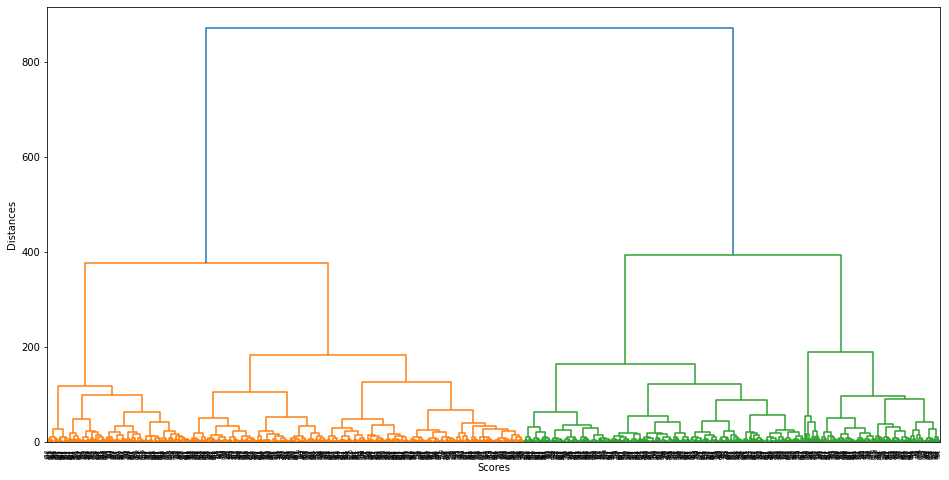

In [12]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(1, figsize = (16 ,8))
merg = linkage(scores, method = "ward")
dendrogram(merg,leaf_rotation=90)
plt.xlabel("Scores")
plt.ylabel("Distances")
plt.show()

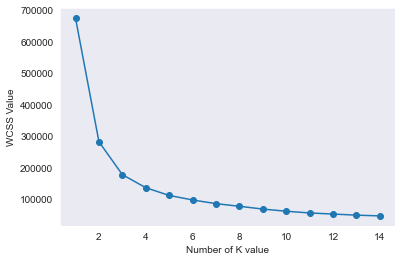

In [50]:
from sklearn.cluster import KMeans

wcss = []
for i in range(1,15):
    kmeans = KMeans(n_clusters=i)
    kmeans.fit(scores)
    wcss.append(kmeans.inertia_)


plt.plot(range(1,15),wcss,"-o")
plt.xlabel("Number of K value")
plt.ylabel("WCSS Value")
plt.show()

then the best k for clustering is 5

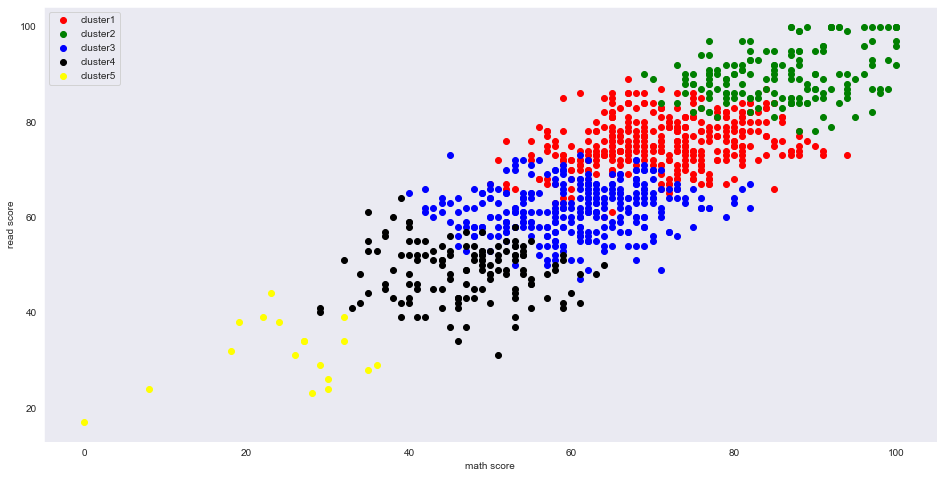

In [38]:
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=5,affinity="euclidean",linkage="ward")


cluster = hc.fit_predict(scores)
plt.figure(1, figsize = (16 ,8))
scores["examscores"] = cluster
plt.scatter(scores.mthscore[scores.examscores == 0],scores.readscr[scores.examscores == 0],color="red", label="cluster1")
plt.scatter(scores.mthscore[scores.examscores == 1],scores.readscr[scores.examscores == 1],color="green", label="cluster2")
plt.scatter(scores.mthscore[scores.examscores == 2],scores.readscr[scores.examscores == 2],color="blue", label="cluster3")
plt.scatter(scores.mthscore[scores.examscores == 3],scores.readscr[scores.examscores == 3],color="black", label="cluster4")
plt.scatter(scores.mthscore[scores.examscores == 4],scores.readscr[scores.examscores == 4],color="yellow", label="cluster5")
plt.xlabel("math score")
plt.ylabel("read score")
plt.legend(loc="upper left")
plt.show()

Clustering is an unsupervised machine learning method of identifying and grouping similar data points in larger datasets without concern for the specific outcome. Clustering (sometimes called cluster analysis) is usually used to classify data into structures that are more easily understood and manipulated.

in this example we spread students by their scores in different groups which would help the principel or school boss to know their students and Provide classes in regard to their group.

---